<a href="https://colab.research.google.com/github/pedroBBastos/mc886-2024/blob/main/C%C3%B3pia_de_MC886_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group information

Names: Paulo Affonso da Silva Campos Júnior, Pedro Barros Bastos

RAs: 186531, 204481

# **Machine Learning MC886/MO444 - Task \#2**: Model Selection for classification


### Objective:

To explore **Model Selection** techniques to select the best model and hyperparameters for a classification task.

#### **Dataset: Online Shoppers Purchasing Intention**

The dataset contains sessions of access to a website. Each user can have only one record for each year, in the case were the users were repeated.

Our classification objective is to determine when a given session will end with the user purchasing something.
This information is present in the "Revenue" column, which is our target.

Features and the corresponding descriptions:

- **Administrative**: Amount of times the user visited this type of page.
- **Administrative_Duration**: Time spent by the user visiting this type of page.
- **Informational**:  Amount of times the user visited this type of page.
- **Informational_Duration**: Time spent by the user visiting this type of page.
- **ProductRelated**:  Amount of times the user visited this type of page.
- **ProductRelated_Duration**: Time spent by the user visiting this type of page.
- **BounceRates**: The bounce rate is the percentage of visitors who enter the site from that page and then leave without triggering any other analytics action. This field contains the average bounce rate of the pages visited.
- **ExitRates**: The Exit rate is the percentage of visitors that exited the site on a specific page. This field contains the average bounce rate of the pages visited.
- **PageValues**: The page value is calculated by google analytics based on the values spent after visiting this page. This field contains the average page values of the pages visited.
- **SpecialDay**: The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
- **Month**: Month of the visit.
- **OperatingSystems**: The operating system used by the visitor. This field is coded as integer categories.
- **Browser**: The browser used by the visitor. This field is coded as integer categories.
- **Region**: The region where the user visited the site. This field is coded as integer categories.
- **TrafficType**: Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct). This field is coded as integer categories.
- **VisitorType**: Visitor type as "New Visitor", "Returning Visitor", and "Other"
- **Weekend**: Boolean value indicating whether the date of the visit is a weekend day.
- **Revenue**: The target value, indicating where the visitor bought something (1) or did not bought anything (0).


**How to load the dataset**

Dataset folder link: [here](https://drive.google.com/drive/folders/14uiy_7xMq5LOqODBzbIJLD4Vq0E9XD5v?usp=sharing)

You should open the google drive folder, click on the name of the folder on the top and click on "organize" => "add shortcut".<br/>
Then you should choose where to add the shortcut. The recommendation is to add on "MyDrive", so you don't need to change the dataset path used below.

Then you should run the cell below and authorize google drive access.

This is the same folder as in the previous task, you can check your google drive to be sure if you need to copy it again.

*If you want to run the notebook locally, just download the folder and change the path below to the location of the folder in your local environment.*

In [1]:
# link with google drive
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "online_shoppers_intention_mod.csv" # Change this to be the correct path if you added the dataset in a different location
df = pd.read_csv(path)

Mounted at /content/gdrive


### **Data analysis and preprocessing** (1.5 points)

In this section, you should explore the dataset. Remember to avoid using data that you should not have in training.

You can plot graphs with features that you think are important to visualize the relation with the target(`Revenue`). You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think can help in understanding the dataset.

As in the previous task, preprocess the data, transform the categorical features with OneHotEncoding, and remember to scale continuous features to be in a similar scale between each other.


In [22]:
# First, verifying missing data:
missing_values = df.isnull()
missing_count = missing_values.sum()
mask = missing_count != 0
print("Missing values in each column:")
print(missing_count[mask])

Missing values in each column:
Series([], dtype: int64)


No missing values (=

First, getting dummies from all the categorical columns and splitting the dataset into trainning set and test set.

In [63]:
# Utilitary functions being used
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

numerical_columns = df.select_dtypes(exclude=['object']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid dummy variable trap
encoded_categorical = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame from the encoded categorical features
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Combine numerical and encoded categorical columns
X = pd.concat([df[numerical_columns], encoded_categorical_df], axis=1)
y = df['Revenue']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Recreate DataFrames for training and testing sets
train_df = pd.DataFrame(data=X_train, columns=X.columns)
train_df['Revenue'] = y_train
test_df = pd.DataFrame(data=X_test, columns=X.columns)
test_df['Revenue'] = y_test

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9864 entries, 1785 to 7270
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 9864 non-null   int64  
 1   Administrative_Duration        9864 non-null   float64
 2   Informational                  9864 non-null   int64  
 3   Informational_Duration         9864 non-null   float64
 4   ProductRelated                 9864 non-null   int64  
 5   ProductRelated_Duration        9864 non-null   float64
 6   BounceRates                    9864 non-null   float64
 7   ExitRates                      9864 non-null   float64
 8   PageValues                     9864 non-null   float64
 9   SpecialDay                     9864 non-null   float64
 10  OperatingSystems               9864 non-null   int64  
 11  Browser                        9864 non-null   int64  
 12  Region                         9864 non-null   int

In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2466 entries, 8916 to 2611
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 2466 non-null   int64  
 1   Administrative_Duration        2466 non-null   float64
 2   Informational                  2466 non-null   int64  
 3   Informational_Duration         2466 non-null   float64
 4   ProductRelated                 2466 non-null   int64  
 5   ProductRelated_Duration        2466 non-null   float64
 6   BounceRates                    2466 non-null   float64
 7   ExitRates                      2466 non-null   float64
 8   PageValues                     2466 non-null   float64
 9   SpecialDay                     2466 non-null   float64
 10  OperatingSystems               2466 non-null   int64  
 11  Browser                        2466 non-null   int64  
 12  Region                         2466 non-null   int

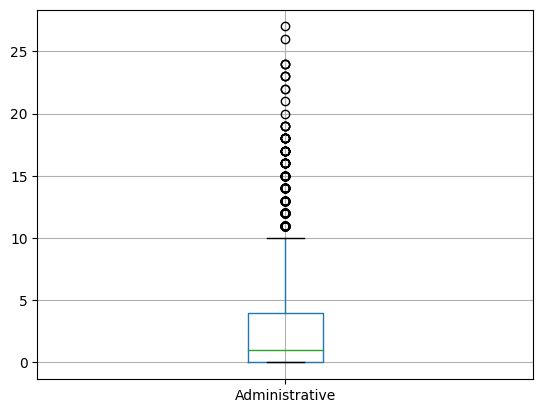

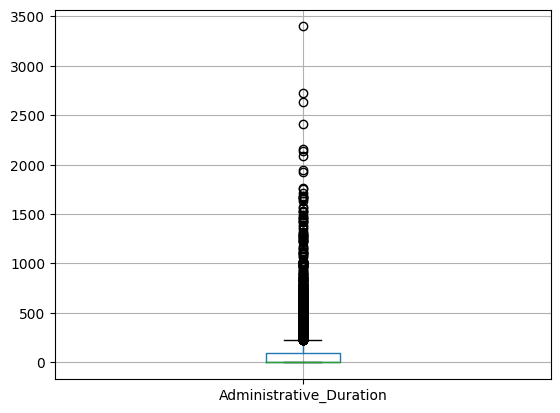

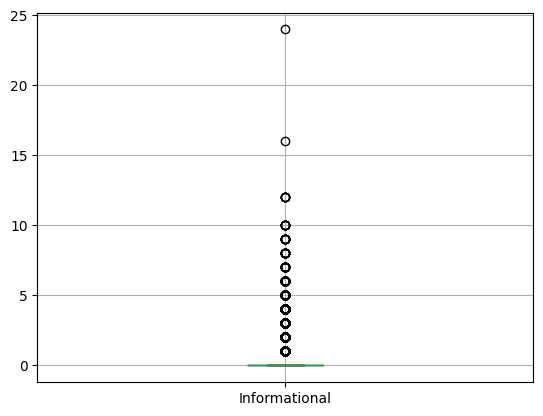

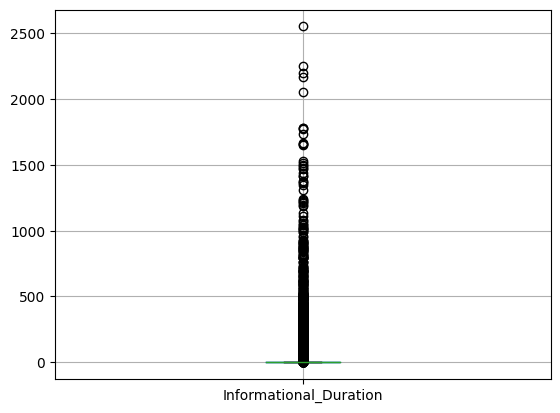

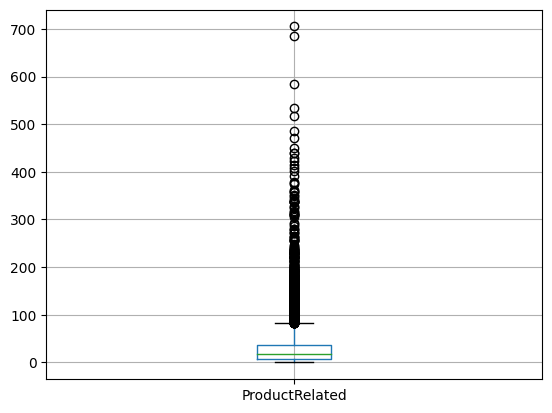

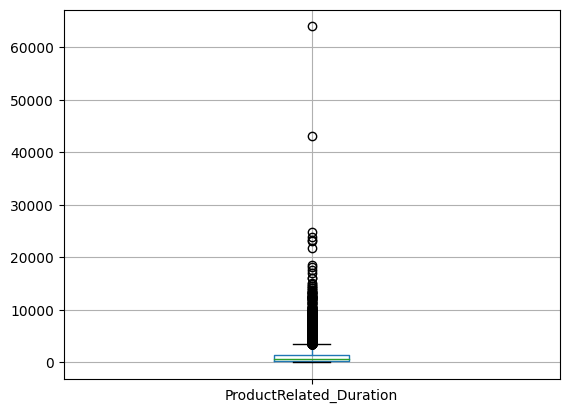

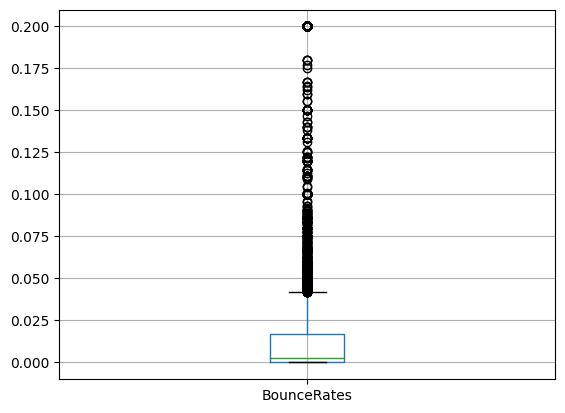

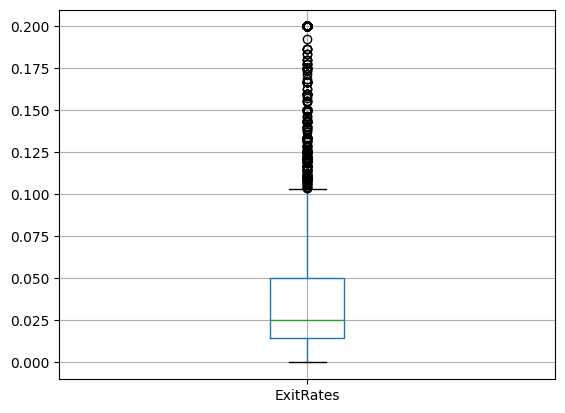

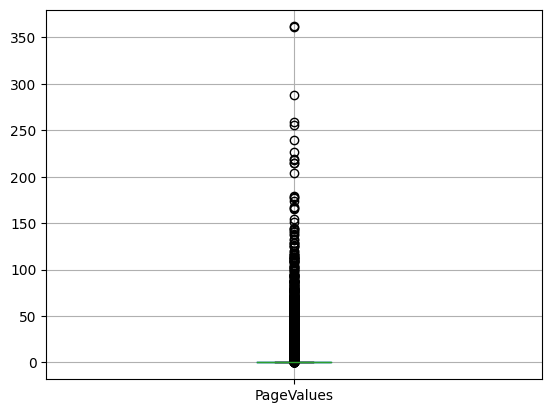

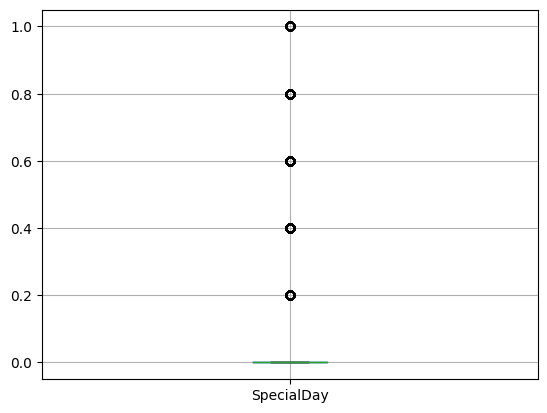

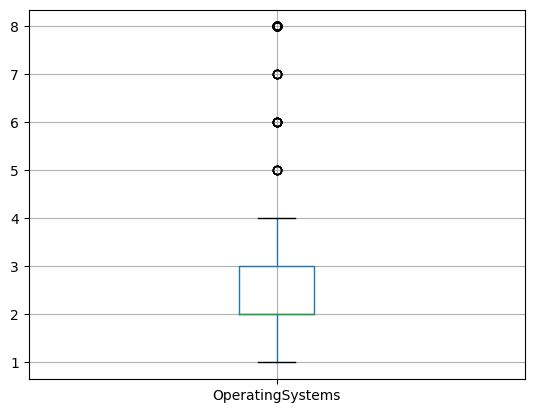

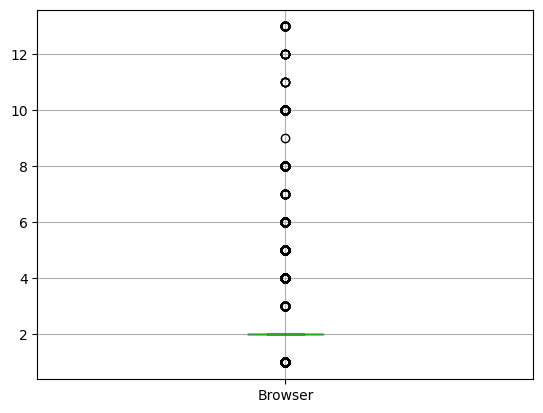

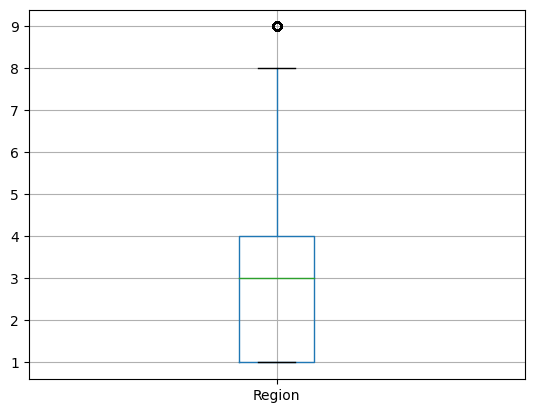

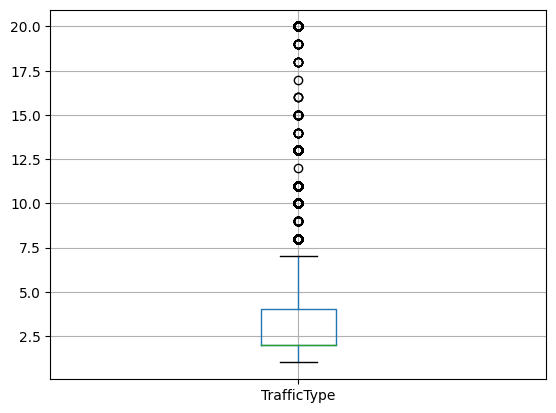

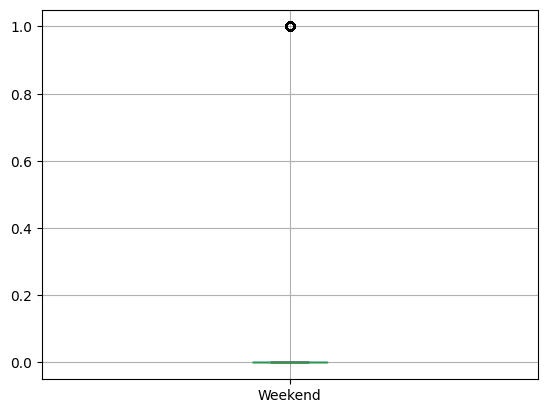

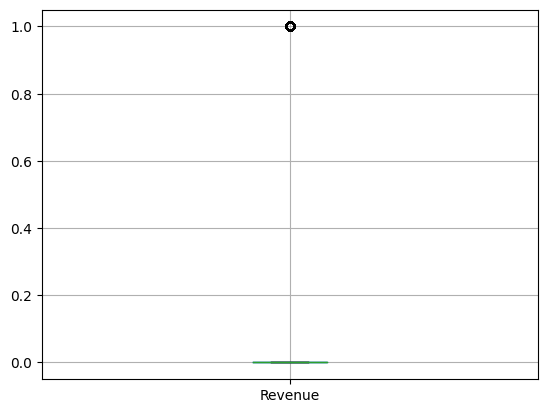

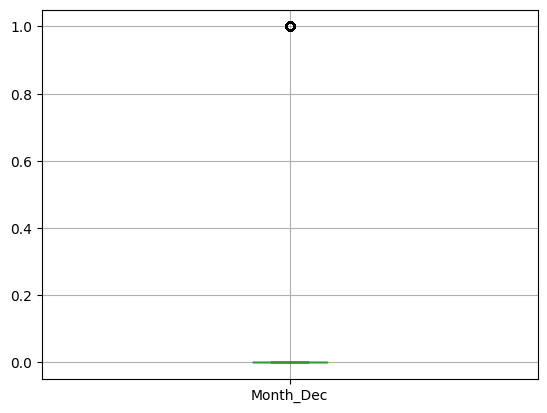

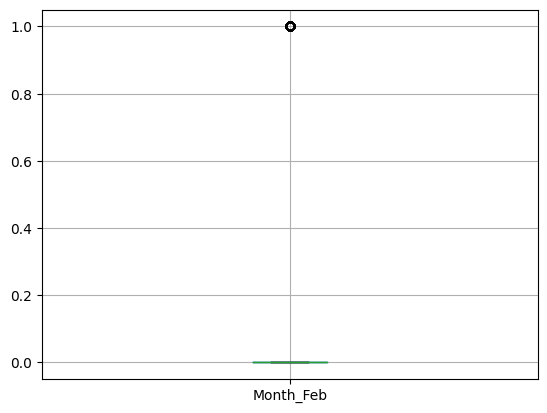

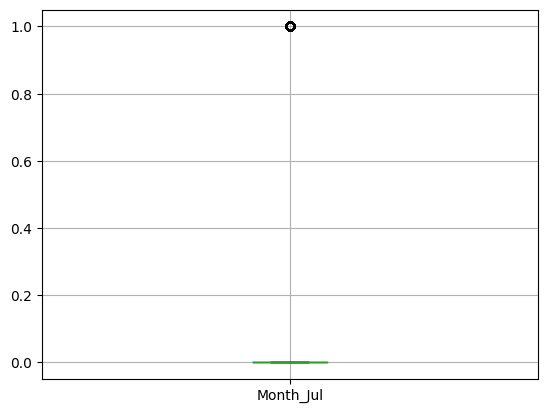

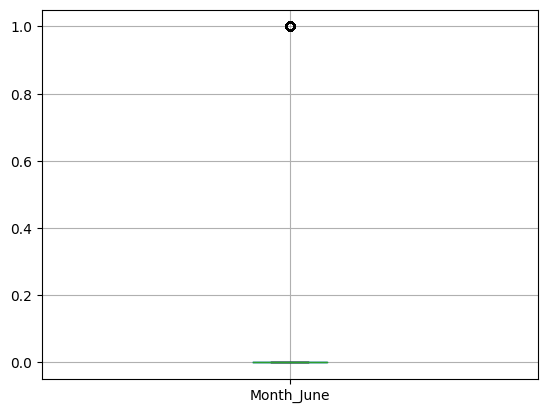

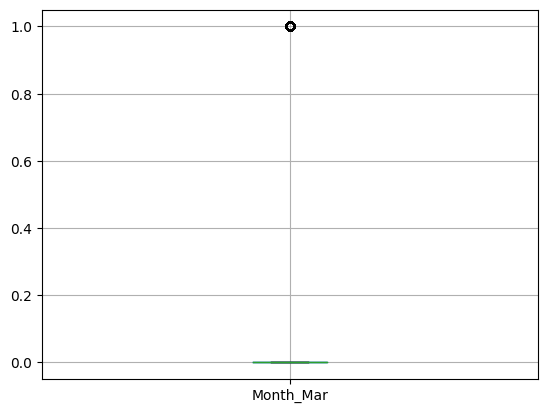

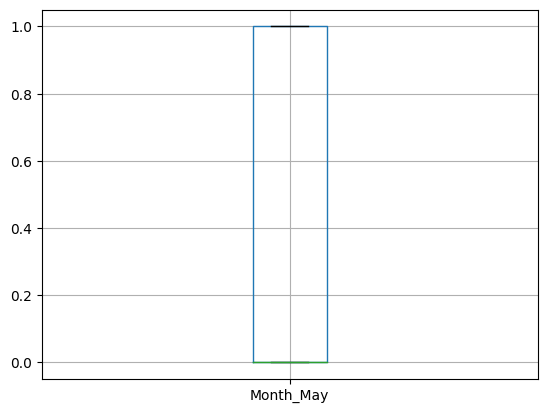

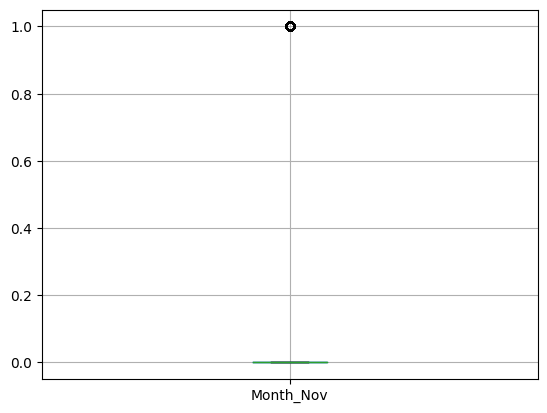

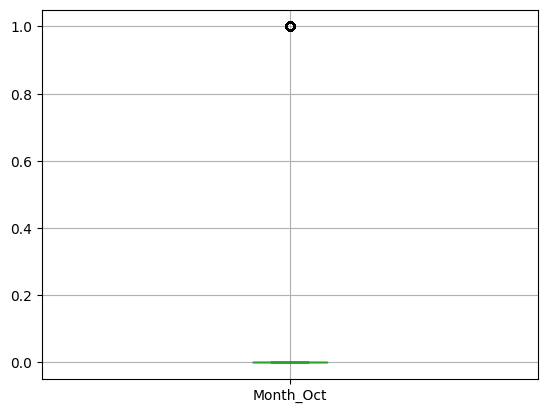

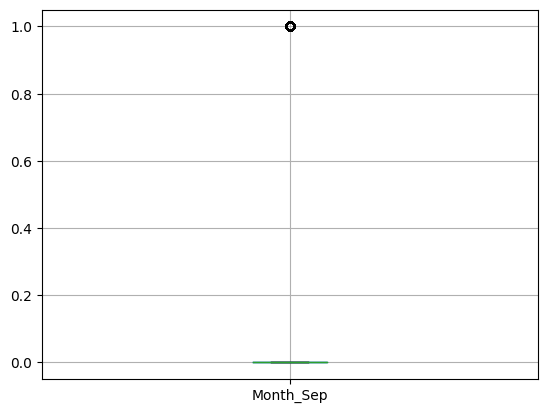

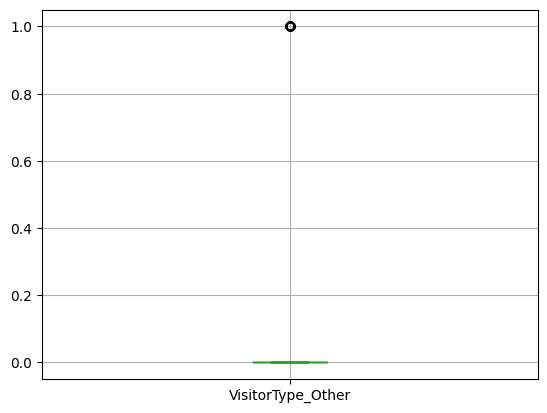

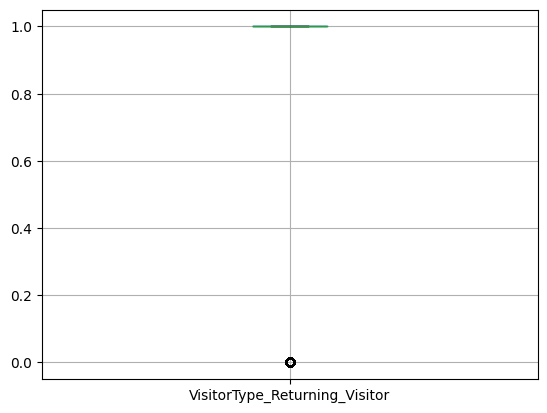

In [66]:
import matplotlib.pyplot as plt

# Plotting boxplots for all non-object columns
for c in train_df.select_dtypes(exclude='object').columns:
  train_df.boxplot(column=[c])
  plt.show()

As shown in the above boxplots and verified in the below describe() call, there are a lot of columns with more than 75% of its data filled with just one value. For example, 'Information', 'Informational_Duration', 'PageValues' and the target 'Revenue' as well. This may impact significantly the training and imply in huge miss predictions, as there isn't many data variation.

In [67]:
train_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
count,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,...,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000
mean,2.302818,81.107226,0.503447,34.062159,31.736922,1197.331019,0.021659,0.042613,5.832987,0.061071,...,0.013990,0.035888,0.023824,0.154298,0.269972,0.245032,0.044607,0.035888,0.007603,0.855535
std,3.297117,177.511054,1.266877,138.941112,44.562956,1922.835536,0.047469,0.047839,18.483546,0.198057,...,0.117456,0.186021,0.152508,0.361253,0.443967,0.430128,0.206449,0.186021,0.086870,0.351578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,186.000000,0.000000,0.014286,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.541667,0.002961,0.025000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,92.000000,0.000000,0.000000,37.000000,1471.189584,0.016667,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
import numpy as np

count0_train = np.sum(y_train == 0)
count1_train = np.sum(y_train == 1)

count0_test = np.sum(y_test == 0)
count1_test = np.sum(y_test == 1)

# accuracy -> for balanced data
# F1 -> for imbalanced data
print("% class 0 in train set -> ", count0_train/y_train.size, "; % class 1 in train set -> ", count1_train/y_train.size)
print("% class 0 in test set -> ", count0_test/y_test.size, "; % class 1 in test -> ", count1_test/y_test.size)

% class 0 in train set ->  0.8482360097323601 ; % class 1 in train set ->  0.1517639902676399
% class 0 in test set ->  0.8333333333333334 ; % class 1 in test ->  0.16666666666666666


Moreover, the code above counts each class in each set previously split. Now, it's even more obvious that we have an unbalanced dataset in hand, considering the target column.

Now that we analysed the raw data, we use the standard scaler to better work in future operations with the datase.

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### **Metric selection** (0.5 point)

As we're working with unbalanced data, the accuracy metric is not a good indicator of performance. Choose a metric and explain why that metric is a good fit for the online shopping intention problem. You don't need to implement the metric, only discuss it.

*Tip: Some common metrics are [balanced accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html), [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [f1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)*.

----------------------------------------

### **Feature selection** (2 points)

As seen in class, there are different ways to select which features to use in a machine learning model.

You should implement the "Forward stepwise selection" technique to find the best `p` features to be used in this task according to that method.

Use the [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model and the **K-fold cross-validation** as optimality criterion. You can use the Scikit-learn library, which has helper functions to create the [K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) logic and the model. The metric used in K-fold should be the one chosen in the previous section!

Remember to save a new dataframe only with the selected features for the next steps! Also, use only training data on K-fold validation, keeping a test set separated to estimate the performance of the model on unseen data on the final part of the whole task.

------------------------

### **Model selection** (4 points)

This is the main section of the task. Using the features selected in the previous section, you should do a [**Grid search** with K-fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to select the best classification model and its hyperparameters for this task. You can do it by hand if you want (you will need to do a nested loop for each tested parameter to have all combinations).

Remember to use only training data on K-fold validation, keeping a test set separated to estimate the performance of the model on unseen data.

You should train and validate the following models:
- [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Ridge Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)
- [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

As the Lasso model do not predict classes, you would need to convert the results to classes, and execute a GridSearch by hand. Alternatively, you can use only the Logistic regression model and test the regularization parameters ('l1' for Lasso regularization and 'l2' for Ridge) and show the best hyperparemeters when using each regularization. Remember to change the "C" parameter (the smaller the C, the stronger is the regularization).

Explore the documentation above and select which hyperparameters to vary, besides the regularization ones.

Also, you should test the polynomial transformation to find possible nonlinear relations between the features of the dataset. **Do not** use values above "3" for the `degree` of the polynomial transformation, as the number of features increases exponentially.

In short, you should use GridSearchCV (that uses K-fold internally) to get the best hyperparameters for the model using different regularization parameters, while also testing the polynomial transformation.

*Note: you will need to use the `fit` method more than once to test the different dataset transformations. Choose wisely which hyperparameters to test, as the GridSearch will test all combinations and can take very a long time to finish.*

#### Discussion of key points

- What was the best model hyperparemeters, according to cross validation?
- The models that use regularization were able to outperform the Logistic Regression without it? Explain why.


### Threshold testing (1 point)

The three models trained in the previous session can return the probabilities of a sample being of the positive class.
The default threshold used to convert the results to the desired 0 or 1 output is `0.5`.

Use the K-fold cross validation to test different thresholds with the best models trained in the previous section (remember to train the best models with all train data and the best hyperparameters).

*If the model does not output probabilities, look for the `predic_proba` method*.

### Visualizing/interpreting weights (0.5 point)

As we're dealing with models that apply regularization terms, it's relatively easy to verify those results on the coefficient weights of the trained models.

Use the function below to visualize the weights of the final models.</br>
Also, train the three models again using *all* original features, and use the function below to compare how the weight distribution behaves on each of the models*.

\* *If no features were removed in previous sections, just compare the models with and without regularization*

In [ ]:
## You don't need to change this cell!
import plotly.express as px

def plot_weights(model, columns):
  '''
  Plot the weights of the model for each column in an interative graph.
  "model" should be an sklearn model or follow the same interface, having the "coef_" attribute with the weights.

  -----
  Examples:
  plot_weights(classifier, X.columns)
  # for polynomial transformations
  plot_weights(classifier, poly.get_feature_names_out(X.columns))

  '''
  if not hasattr(model, 'coef_'):
    print("Invalid model!")
    return

  df_plot = pd.DataFrame(columns=['weight','columns'])
  df_plot['columns']= columns

  if len(columns) == len(model.coef_):
    df_plot['weight']=model.coef_
  else:
    df_plot['weight']=model.coef_[0]

  fig = px.bar(df_plot, x='columns', y='weight', color='weight')
  fig.show()

In [ ]:
# Plot the weights of your models!

#### Discussion of key points

- What conclusions can you have when looking at the different graphs?


In [ ]:
hasattr(obj, 'attribute')

### Testing (0.5 point)

Finally, choose your **Best** model in validation, test it and plot the normalized confusion matrix.

## Deadline

Thursday, May 2, 11:59 pm.

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- May ~(3)~ 6 11:59 pm : grade * 0.75
- May ~(4)~ 7, 11:59 pm : grade * 0.5
- May ~(5)~ 8, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English) or Google Colaboratory link (remember to share it!).

**This activity is NOT individual, it must be done in pairs (two-person group).**

Only one individual should deliver the notebook.